Analytical Solution training fMSE: 39.242962989290696
Analytical Solution testing fMSE: 206.79647485466757
Gradient Descent training fMSE: 83.56600471266958
Gradient Descent testing fMSE: 93.11048528888493
Gradient Descent with Regularization training fMSE: 83.49189340762285
Gradient Descent with Regularization testing fMSE: 93.12619983921986


C:\Users\caleb\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


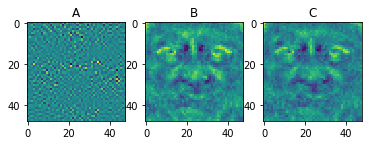

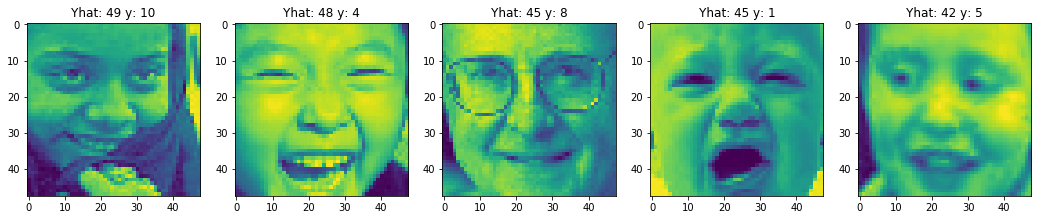

In [135]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Given an array of faces (N x M x M, where N is number of examples and M is number of pixes along each axis),
# return a design matrix Xtilde ((M**2 + 1) x N) whose last row contains all 1s.
def reshapeAndAppend1s (faces):
    X = faces.reshape(faces.shape[0], faces.shape[1] ** 2)
    b = np.ones((faces.shape[0], 1))
    Xwithb = np.append(X, b, axis = 1)
    Xtilde = Xwithb.T
    return Xtilde

# Given a vector of weights w, a design matrix Xtilde, and a vector of labels y, return the (unregularized)
# MSE.
def fMSE (w, Xtilde, y):
    yhat = np.dot(Xtilde.T, w)
    MSE = np.sum(np.square(yhat - y)) / (2 * y.shape[0])
    return MSE

# Given a vector of weights w, a design matrix Xtilde, and a vector of labels y, and a regularization strength
# alpha (default value of 0), return the gradient of the (regularized) MSE loss.
def gradfMSE (w, Xtilde, y, alpha = 0.):
    gradient = np.dot(Xtilde, (np.dot(Xtilde.T, w) - y)) / np.shape(Xtilde)[1] + alpha / (2 * np.shape(Xtilde)[1]) * np.dot(w, w.T)
    return gradient

# Given a design matrix Xtilde and labels y, train a linear regressor for Xtilde and y using the analytical solution.
def method1 (Xtilde, y):
    w = np.linalg.solve(np.dot(Xtilde, Xtilde.T), np.dot(Xtilde, y))
    return w

# Given a design matrix Xtilde and labels y, train a linear regressor for Xtilde and y using gradient descent on fMSE.
def method2 (Xtilde, y):
    w = gradientDescent(Xtilde, y)
    return w

# Given a design matrix Xtilde and labels y, train a linear regressor for Xtilde and y using gradient descent on fMSE
# with regularization.
def method3 (Xtilde, y):
    ALPHA = 0.1
    w = gradientDescent(Xtilde, y, ALPHA)
    return w

# Helper method for method2 and method3.
def gradientDescent (Xtilde, y, alpha = 0.):
    EPSILON = 3e-3  # Step size aka learning rate
    T = 5000  # Number of gradient descent iterations
    learningVector = np.array([EPSILON] * np.shape(Xtilde)[0])
    sigma = .1 # standard deviation is .01, so sigma = sqrt(.01) = .1
    w = sigma * np.random.randn(np.shape(Xtilde)[0])
    
    for iterations in range(T):
        gradient = gradfMSE(w, Xtilde, y, alpha)
        gradientChange = gradient * EPSILON
        w = w - gradientChange
    return w

def plotWeights(w1, w2, w3):
    dimension = int(math.sqrt(np.shape(w1)[0] - 1))
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
    img1 = np.reshape(w1[:-1], (dimension,dimension))
    img2 = np.reshape(w2[:-1], (dimension,dimension))
    img3 = np.reshape(w3[:-1], (dimension,dimension))
    ax1.imshow(img1)
    ax1.set_title('A')
    ax2.imshow(img2)
    ax2.set_title('B')
    ax3.imshow(img3)
    ax3.set_title('C')
    fig.show()

def plotWorst(w, Xtilde, y):
    errors = np.dot(Xtilde.T, w) - y
    errorsIdx = errors.argsort(axis = 0)[-5:][::-1]
    topErrors = Xtilde[:, errorsIdx]
    errorsYhat = errors[errorsIdx]
    errorsY = y[errorsIdx]
    fig, ax = plt.subplots(1, 5, figsize = (18, 15))
    dimension = int(math.sqrt(np.shape(w)[0] - 1))
    for i in range(np.shape(topErrors)[1]):
        img = topErrors[:-1, i].reshape(dimension, dimension)
        ax[i].imshow(img)
        ax[i].set_title('Yhat: ' + str(int(round(errorsYhat[i]))) + ' y: ' + str(int(errorsY[i])))
    plt.show()

if __name__ == "__main__":
    # Load data
    Xtilde_tr = reshapeAndAppend1s(np.load("age_regression_Xtr.npy"))
    ytr = np.load("age_regression_ytr.npy")
    Xtilde_te = reshapeAndAppend1s(np.load("age_regression_Xte.npy"))
    yte = np.load("age_regression_yte.npy")

    w1 = method1(Xtilde_tr, ytr)
    w2 = method2(Xtilde_tr, ytr)
    w3 = method3(Xtilde_tr, ytr)

    # Report fMSE cost using each of the three learned weight vectors
    fMSE1tr = fMSE(w1, Xtilde_tr, ytr)
    fMSE1te = fMSE(w1, Xtilde_te, yte)
    fMSE2tr = fMSE(w2, Xtilde_tr, ytr)
    fMSE2te = fMSE(w2, Xtilde_te, yte)
    fMSE3tr = fMSE(w3, Xtilde_tr, ytr)
    fMSE3te = fMSE(w3, Xtilde_te, yte)
    print("Analytical Solution training fMSE:", fMSE1tr)
    print("Analytical Solution testing fMSE:", fMSE1te)
    print("Gradient Descent training fMSE:", fMSE2tr)
    print("Gradient Descent testing fMSE:", fMSE2te)
    print("Gradient Descent with Regularization training fMSE:", fMSE3tr)
    print("Gradient Descent with Regularization testing fMSE:", fMSE3te)
    plotWeights(w1, w2, w3)
    plotWorst(w3, Xtilde_te, yte)


In [86]:
print("Analytical Solution training fMSE:", fMSE1tr)
print("Analytical Solution testing fMSE:", fMSE1te)
print("Gradient Descent training fMSE:", fMSE2tr)
print("Gradient Descent testing fMSE:", fMSE2te)
print("Gradient Descent with Regularization training fMSE:", fMSE3tr)
print("Gradient Descent with Regularization testing fMSE:", fMSE3te)


Analytical Solution training fMSE: 39.242962989290696
Analytical Solution testing fMSE: 206.79647485466757
Gradient Descent training fMSE: 139.75316978048042
Gradient Descent testing fMSE: 142.70004056051215
Gradient Descent with Regularization training fMSE: 137.1668280892848
Gradient Descent with Regularization testing fMSE: 142.0533677683826


In [87]:
a = np.arange(16).reshape(4,4)

In [115]:
print(Xtilde_tr.shape)

(2305, 5000)
